# Feature Selection

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import ExtraTreesClassifier

In [50]:
df = pd.read_csv('dataset/iris.data', header=None)
df.rename(columns = {0:'Sepal length', 1:'Sepal width', 2:'Petal length', 3:'Petal width', 4:'Class'}, inplace = True)
df.shape

(150, 5)

In [51]:
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [52]:
df['Class'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [0,1,2], inplace=True)

In [53]:
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [54]:
# matriz de correlação
df_correlation = df.corr()

print('Matriz de correlação: ')
display(df_correlation)

Matriz de correlação: 


,Sepal length,Sepal width,Petal length,Petal width,Class
Sepal length,1.000000,-0.109369,0.871754,0.817954,0.782561
Sepal width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
Petal length,0.871754,-0.420516,1.000000,0.962757,0.949043
Petal width,0.817954,-0.356544,0.962757,1.000000,0.956464
Class,0.782561,-0.419446,0.949043,0.956464,1.000000


<AxesSubplot:>

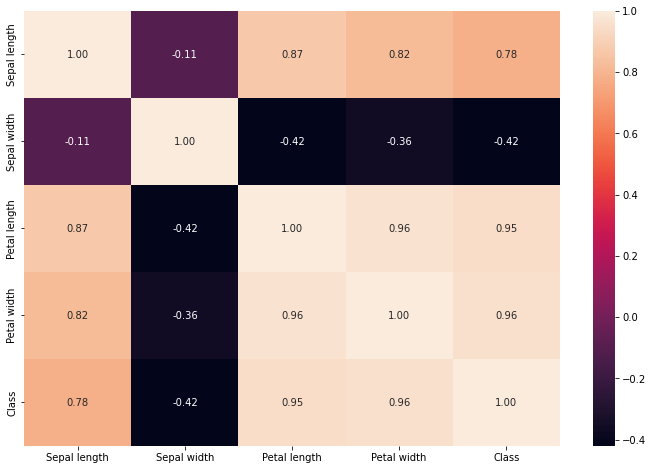

In [55]:
plt.figure(figsize=(12,8))
sns.heatmap(df_correlation, annot=True, fmt='.2f')

In [56]:
# matriz de covariancia
df_covariance = df.cov()

print('Matriz de covariância: ')
display(df_covariance)

Matriz de covariância: 


,Sepal length,Sepal width,Petal length,Petal width,Class
Sepal length,0.685694,-0.039268,1.273682,0.516904,0.530872
Sepal width,-0.039268,0.188004,-0.321713,-0.117981,-0.148993
Petal length,1.273682,-0.321713,3.113179,1.296387,1.371812
Petal width,0.516904,-0.117981,1.296387,0.582414,0.597987
Class,0.530872,-0.148993,1.371812,0.597987,0.671141


<AxesSubplot:>

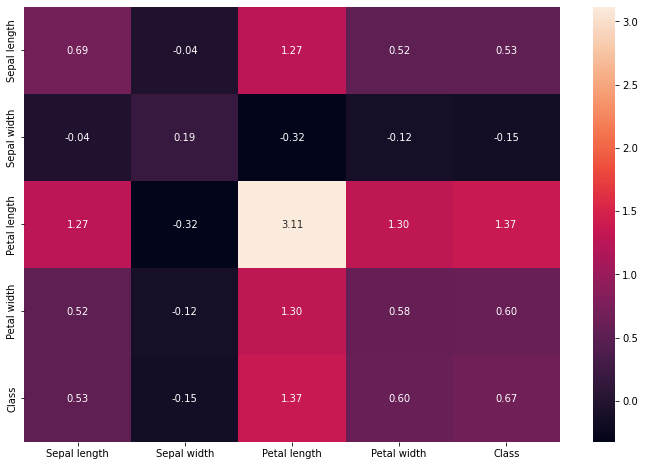

In [57]:
plt.figure(figsize=(12,8))
sns.heatmap(df_covariance, annot=True, fmt='.2f')

In [58]:
X = df.drop('Class', axis=1)
y = df['Class']

<BarContainer object of 4 artists>

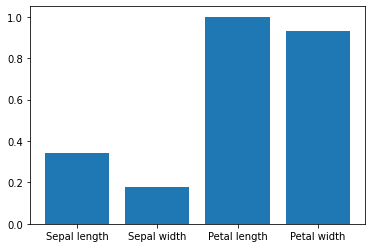

In [64]:
selector = SelectKBest(score_func=f_classif, k=4)
selector.fit(X, y)

scores = -np.log10(selector.pvalues_)
scores /= scores.max()

plt.bar(height=scores, x=X.columns)

In [66]:
model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)

[0.10884685 0.06318631 0.3577353  0.47023153]


<AxesSubplot:>

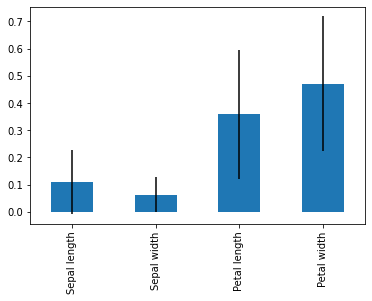

In [69]:
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

feat = pd.Series(model.feature_importances_, X.columns)
feat.plot.bar(yerr=std)